In [5]:
#Libraries

#Dataframe manipulation
import pandas as pd

#Arrays/numerical functions
import numpy as np

#Graphs/Plots
import matplotlib.pyplot as plt
import seaborn as sns

#Classification Algorithms
from sklearn.linear_model import LinearRegression 
from sklearn.impute import KNNImputer 
from sklearn.ensemble import RandomForestClassifier

#Hyperparamater tuning
from sklearn.model_selection import GridSearchCV

#Encoding categorical data
from sklearn import preprocessing

#Data manipulation
from sklearn.model_selection import train_test_split

#Classification report
from sklearn.metrics import classification_report


#Load Dataframe
data= pd.read_csv(r'healthcare-dataset-stroke-data.csv',index_col='id')
data=data.sort_values(by=['id'])
data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
67,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0


In [6]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
#Seperating data in numerical and categorical
#Numerical data
numerics = ['float16', 'float32', 'float64']
numerical_data = data.select_dtypes(include=numerics)
numerical_data.head()
#Categorical data
nm_col=numerical_data.columns
categorical_data=data.drop(nm_col,axis=1)
#Numerical w/ Stroke
numerical_data_s=numerical_data.copy()
numerical_data_s['stroke']=categorical_data['stroke']


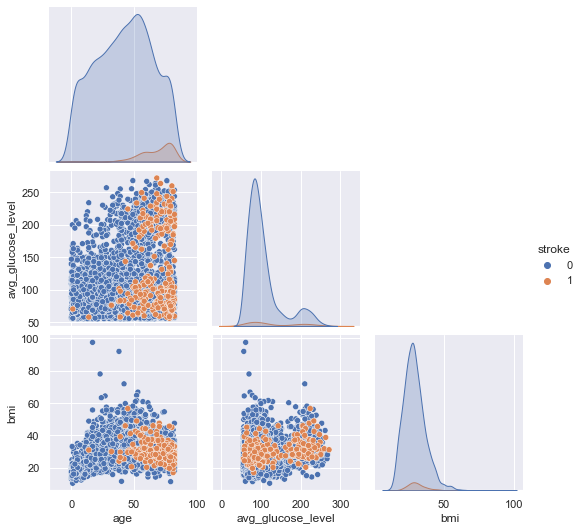

In [8]:
#Numerical Data plotting
sns.set()
sns.pairplot(numerical_data_s.sort_values(by=['stroke']),hue='stroke',corner=True)

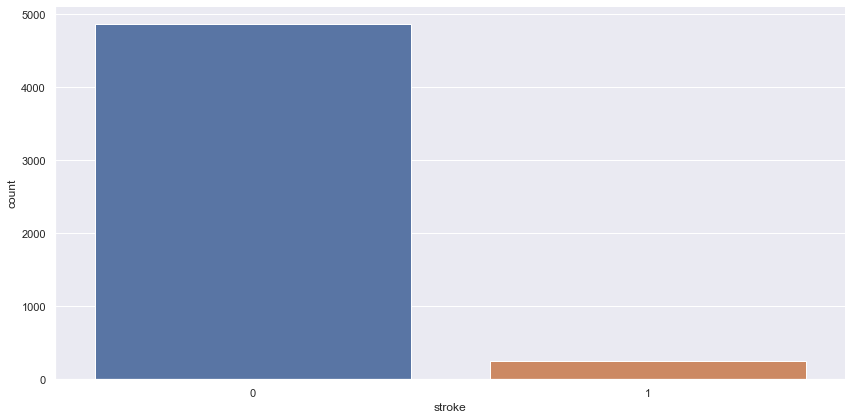

<Figure size 432x432 with 0 Axes>

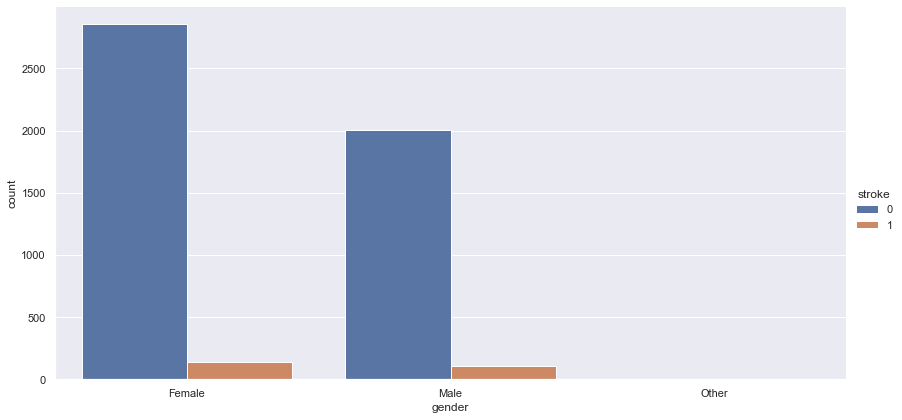

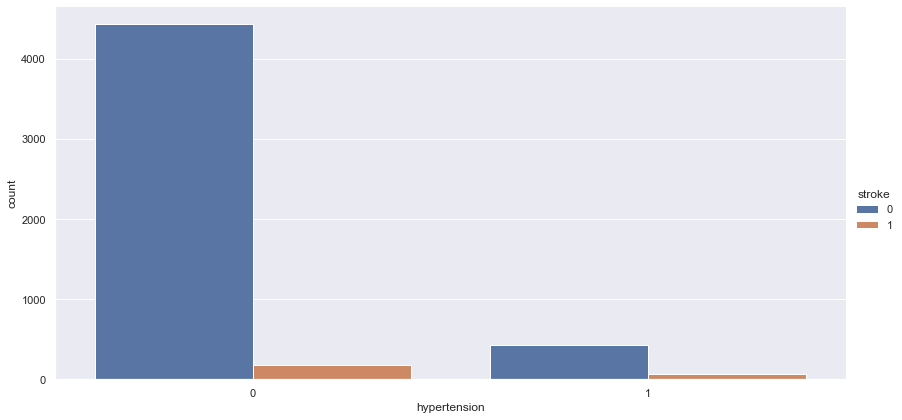

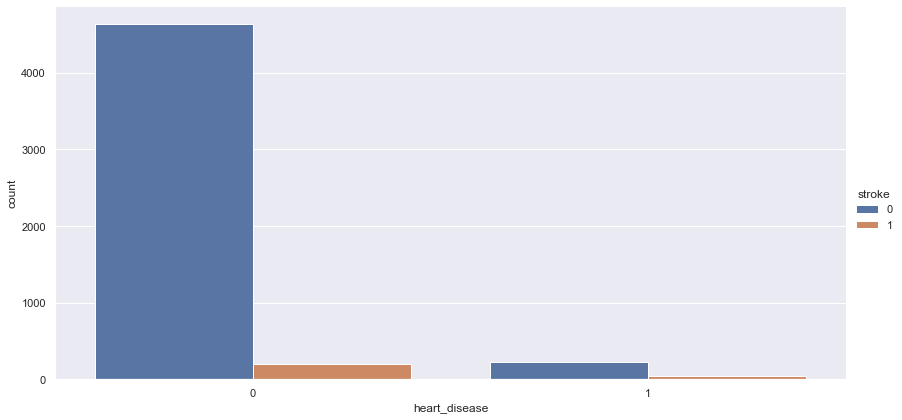

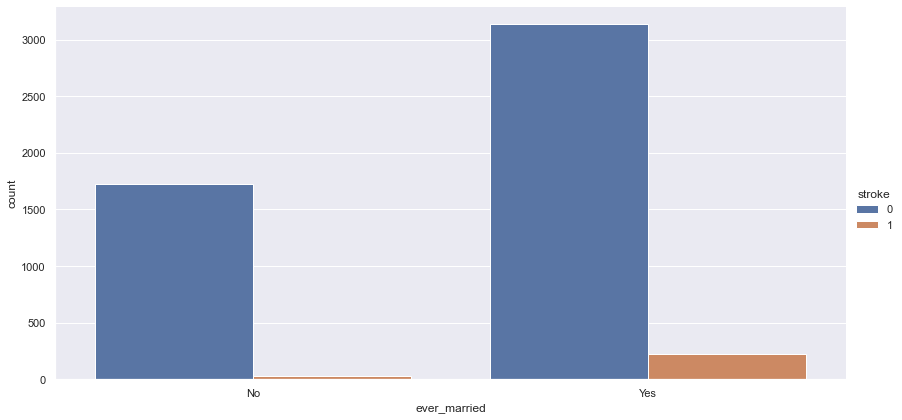

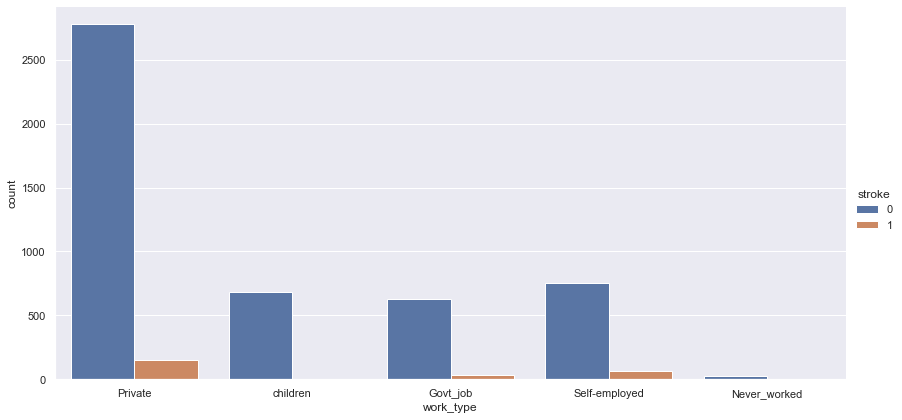

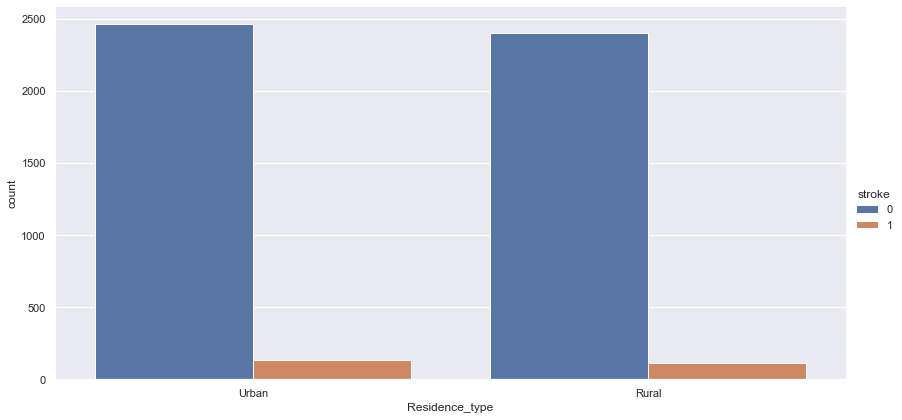

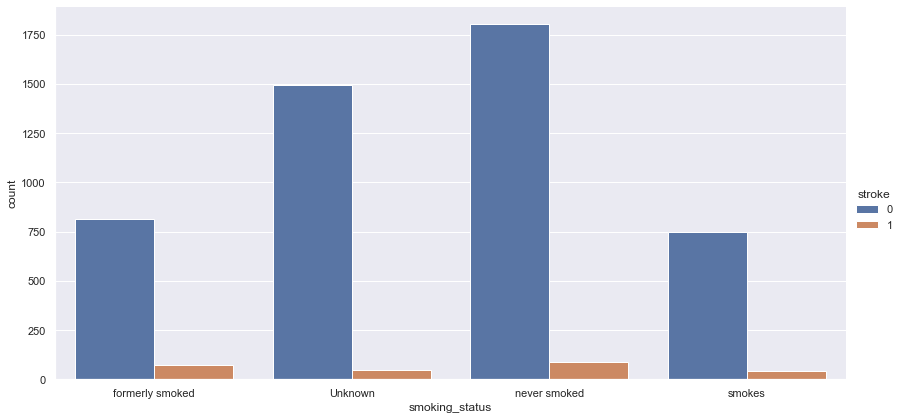

In [9]:
#Categorical Data plotting
sns.catplot(data=categorical_data,x='stroke',kind='count',height=6,aspect=2)
fig = plt.figure(figsize=(6,6))
for i,column in enumerate(categorical_data.columns):
    if(i!=7): sns.catplot(data=categorical_data, kind='count', x=column, hue='stroke',height=6,aspect=2)


In [10]:
#Copy Data 

data['smoking_status']=data['smoking_status'].replace('Unknown',np.NaN)
data.isnull().sum()
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
67,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
77,Female,13.0,0,0,No,children,Rural,85.81,18.6,NaN,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,NaN,0


In [11]:
#Remove NaN containing columns
removed_data=data.copy()
removed_data=removed_data.dropna(axis=1)
removed_data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke
id,,,,,,,,,
67,Female,17.0,0,0,No,Private,Urban,92.97,0
77,Female,13.0,0,0,No,children,Rural,85.81,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,0
91,Female,42.0,0,0,No,Private,Urban,98.53,0
99,Female,31.0,0,0,No,Private,Urban,108.89,0


In [12]:
#Replace NaN values with mean of column (for numerical data)
mean_data=data.copy()
mean_data=mean_data.drop(columns="smoking_status")
mean_data["bmi"]=mean_data["bmi"].fillna(mean_data["bmi"].mean())
mean_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
id,,,,,,,,,,
67,Female,17.0,0,0,No,Private,Urban,92.97,28.893237,0
77,Female,13.0,0,0,No,children,Rural,85.81,18.600000,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.500000,0
91,Female,42.0,0,0,No,Private,Urban,98.53,18.500000,0
99,Female,31.0,0,0,No,Private,Urban,108.89,52.300000,0


In [13]:
#Replace NaN values with Linear Regression (for numerical data)
data.corr() #Highsest Correlation Bmi-Age
linreg_data=data.copy()
#Creating testing and training data
linreg_train_data=data.copy()
linreg_test_data=data.copy()
linreg_test_data.drop(columns='smoking_status')
linreg_test_data=linreg_test_data[linreg_test_data['bmi'].isnull()]
linreg_train_data=linreg_train_data[['age','bmi']]
linreg_train_data.dropna(inplace=True)
#Reshaping training data to use in classifier
y_train = np.array(linreg_train_data['bmi']).reshape(-1, 1)
X_train = np.array(linreg_train_data['age']).reshape(-1, 1)
X_test=np.array(linreg_test_data['age']).reshape(-1,1)
#Linear Regression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_predict=reg.predict(X_test)
y_predict=[y_predict[x][0] for  x in range (len(y_predict))]
#Passing bmi predictions back to original data
i=0
for index,row in linreg_data.iterrows():
    if np.isnan(row['bmi']) :
        linreg_data.at[index,'bmi']=y_predict[i]
        i+=1
linreg_data=linreg_data.drop(columns='smoking_status')
linreg_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
id,,,,,,,,,,
67,Female,17.0,0,0,No,Private,Urban,92.97,25.890403,0
77,Female,13.0,0,0,No,children,Rural,85.81,18.600000,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.500000,0
91,Female,42.0,0,0,No,Private,Urban,98.53,18.500000,0
99,Female,31.0,0,0,No,Private,Urban,108.89,52.300000,0


In [10]:
#Replace NaN values with KNN classifier (for categorical data)
#Encoder
le=preprocessing.LabelEncoder()
#Removing numerical data
knn_data=data.copy()
knn_data=knn_data.drop(columns=numerical_data.columns)
#Splitting testing and training data to encode them
nan_data=knn_data[knn_data['smoking_status'].isnull()]
non_nan_data=knn_data.dropna()
#Encoding categorical data
for column in non_nan_data:
    if column in categorical_data.columns:
        non_nan_data[column]=le.fit_transform(non_nan_data[column])
    if column in categorical_data.columns and column!='smoking_status':
        nan_data[column]=le.fit_transform(nan_data[column])
knn_data=non_nan_data.append(nan_data).sort_values(by=['id'])

#KNN classifier with 5 nearest neighbors
knn=KNNImputer(n_neighbors=5)
predictions_array=knn.fit_transform(knn_data)
y_predict=pd.DataFrame(data=predictions_array, index=knn_data.index, columns=knn_data.columns)
y_predict=y_predict.astype(np.int64)

#Decoding categorical data back to original values
knn_data=data.copy()
knn_data=knn_data.drop('bmi',axis=1)
knn_data['smoking_status']=y_predict['smoking_status'].replace({0:'formely smoked',1:'never smoked',2:'smokes'})
knn_data.isnull().sum()
knn_data.head()



C:\Users\Ryzen\AppData\Local\Temp/ipykernel_10396/1992591806.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_nan_data[column]=le.fit_transform(non_nan_data[column])
C:\Users\Ryzen\AppData\Local\Temp/ipykernel_10396/1992591806.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_data[column]=le.fit_transform(nan_data[column])


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
id,,,,,,,,,,
67,Female,17.0,0,0,No,Private,Urban,92.97,formely smoked,0
77,Female,13.0,0,0,No,children,Rural,85.81,never smoked,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,never smoked,0
91,Female,42.0,0,0,No,Private,Urban,98.53,never smoked,0
99,Female,31.0,0,0,No,Private,Urban,108.89,never smoked,0


In [11]:
#No NaN values (both categorical and numerical data)
combined_data=data.copy()
#Bmi->Linear Regression, smoking_status->KNN
combined_data['bmi']=linreg_data['bmi']
combined_data['smoking_status']=knn_data['smoking_status']
combined_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
#Encoding categorical data
for column in combined_data:
    if  column in categorical_data.columns:
        combined_data[column]=le.fit_transform(combined_data[column])
for column in removed_data:
    if  column in categorical_data.columns:
        removed_data[column]=le.fit_transform(removed_data[column])
for column in linreg_data:
    if  column in categorical_data.columns:
        linreg_data[column]=le.fit_transform(linreg_data[column])
for column in knn_data:
    if  column in categorical_data.columns:
        knn_data[column]=le.fit_transform(knn_data[column])
for column in mean_data:
    if  column in categorical_data.columns:
        mean_data[column]=le.fit_transform(mean_data[column])



In [17]:
#Random Forest Classifier report function
def RFClassificationReport(check_data,hpm_tuning=False):
    X=check_data.iloc[:,:-1].values
    y=check_data.iloc[:,len(X[0])].values
    #Create training/test data 3:1 ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    if not hpm_tuning:
        rfc=RandomForestClassifier()
        rfc.fit(X_train,y_train)
    else:
        #Hyperparameter tuning
        rfc=RandomForestClassifier()
        param_grid = { 
            'n_estimators': [10,200,500], #Number of trees to be used in the RFC
            'min_samples_leaf': [1, 2, 3], #Minimum amount of samples required to be a lead node in the RFC
            'max_depth' : [6,7,None] #Max depth of a tree in the RFC
            }
        #Find best parameters from the above combinations
        rfc=GridSearchCV(estimator=rfc,param_grid=param_grid)
        rfc.fit(X_train,y_train)
    y_predict=rfc.predict(X_test)
    print('No Hyperparameter tuning :\n') if not hpm_tuning else print('With Hyperparameter tuning :\n')
    print(classification_report(y_test, y_predict,zero_division=1))
    print("--------END_OF_REPORT--------\n")



In [18]:
#Random Forest Classifier with different datasets (75%training data - 25% test data)
RFClassificationReport(removed_data)
RFClassificationReport(removed_data,hpm_tuning=True)

RFClassificationReport(mean_data)
RFClassificationReport(mean_data,hpm_tuning=True)

RFClassificationReport(linreg_data)
RFClassificationReport(linreg_data,hpm_tuning=True)

RFClassificationReport(knn_data)
RFClassificationReport(knn_data,hpm_tuning=True)

RFClassificationReport(combined_data)
RFClassificationReport(combined_data,hpm_tuning=True)


No Hyperparameter tuning :

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1204
           1       0.22      0.03      0.05        74

    accuracy                           0.94      1278
   macro avg       0.58      0.51      0.51      1278
weighted avg       0.90      0.94      0.91      1278

--------END_OF_REPORT--------

With Hyperparameter tuning :

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1221
           1       0.50      0.05      0.10        57

    accuracy                           0.96      1278
   macro avg       0.73      0.53      0.54      1278
weighted avg       0.94      0.96      0.94      1278

--------END_OF_REPORT--------

No Hyperparameter tuning :

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1212
           1       1.00      0.00      0.00        66

    accuracy                      